<img src="https://raw.githubusercontent.com/tdch3n/who-pictures/main/logo.png" align="left" style="display: inline-block; margin-left: 10px; height: 180px;">
<h1 style="display: inline-block; color: #006F42; margin-left: 80px;">Project WHO - Linear Regression Predictive Model for Life Expectancy</h1>
<h2 align= "left">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;By: Harry, Simon, Tai & Yassim</h2>

# Predicting life expectancy with the WHO dataset

<h2 align= "left" style="color: #006F42">Prerequisites</h2>

<ol>
    <li>Please ensure that "Life Expectancy Data.csv" is in the same folder as this notebook.</li>
    <li>Make ensure you import the packages stated below before attempting to run the code.</li>
</ol>

In [356]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt #VISUALS
import numpy as np
import os
import seaborn as sns
import math # has math functions
import ipywidgets as widgets # for dropdown menu

from sklearn.linear_model import LinearRegression # is the package to build the linear regression model
from sklearn import metrics # contains functions for module evaluation

# train/test split lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# modeling libs
import statsmodels.api as sm # models
import statsmodels.tools # metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

<h2 align= "left" style="color: #006F42">Importing and exploring the data</h2>

### Loading in the data 

In [360]:
base_data = pd.read_csv('Life Expectancy Data.csv')

In [362]:
base_data.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


### Making a copy and splitting into train and test

In [365]:
world_health_data = base_data.copy()

In [367]:
# Create X, and y.
X = world_health_data.drop(columns = 'Life_expectancy')
y = world_health_data['Life_expectancy']

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 31168) # Random generated number

In [371]:
# Sanity check for our split
print(all(X_train.index == y_train.index)) # Check training indices match~
print(all(X_test.index == y_test.index)) # Check test indices match

True
True


<h3>Data exploration</h3>  

#### Null checks

In [375]:
# No nulls were present
X_train.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
dtype: int64

#### 'Country' checks

In [378]:
country_names = X_train['Country'].unique()
#sorted(country_names)

**No misnomers/country duplicates**

#### 'Region' checks

In [382]:
X_train['Region'].unique()

array(['European Union', 'Africa', 'Middle East',
       'Central America and Caribbean', 'Asia', 'Rest of Europe',
       'Oceania', 'South America', 'North America'], dtype=object)

**No misnomers/region duplicates**

#### Summary of numeric columns

In [386]:
X_train.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
count,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
mean,2007.495853,30.408992,42.973112,192.544240,4.865521,84.301179,77.215626,25.008337,86.595373,86.378874,0.905840,11663.424269,36.249961,4.849629,4.890528,7.632824,0.208643,0.791357
std,4.645734,27.446638,44.325037,115.445397,3.991744,15.870466,18.743004,2.179817,15.021526,15.471951,2.409508,17187.094417,134.733677,4.432595,4.517342,3.170400,0.406427,0.406427
min,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.900000,8.000000,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000
25%,2003.000000,8.050000,9.600000,106.433000,1.200000,78.000000,64.000000,23.200000,82.000000,81.000000,0.080000,1385.000000,2.090000,1.600000,1.600000,5.000000,0.000000,1.000000
50%,2007.000000,19.900000,23.400000,164.177000,4.170000,89.000000,83.000000,25.500000,93.000000,93.000000,0.160000,4276.000000,8.040000,3.300000,3.300000,7.800000,0.000000,1.000000
75%,2012.000000,47.350000,66.000000,247.881250,7.905000,96.000000,93.000000,26.400000,97.000000,97.000000,0.465000,12793.000000,23.545000,7.200000,7.250000,10.300000,0.000000,1.000000
max,2015.000000,138.100000,224.900000,719.360500,17.750000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,112418.000000,1379.860000,27.700000,28.600000,14.100000,1.000000,1.000000


There are 0's in alcohol consumption suggesting potential missing data or issues

#### Checking the 'Alcohol_consumption' column

In [390]:
X_train[X_train['Alcohol_consumption']==0]

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
1816,Somalia,Africa,2012,91.0,147.8,320.8515,0.0,42,64,22.9,47,42,0.13,331,12.72,6.8,6.7,2.1,0,1
1928,Somalia,Africa,2004,104.4,172.7,343.9350,0.0,42,64,22.4,30,30,0.13,213,10.13,7.6,7.4,2.1,0,1
590,Kuwait,Middle East,2015,7.5,8.8,58.1365,0.0,99,96,29.5,99,99,0.13,29870,3.84,3.5,3.4,7.1,0,1
1048,Somalia,Africa,2013,88.4,143.0,316.6690,0.0,42,64,23.0,47,42,0.13,330,13.06,6.8,6.6,2.1,0,1
1994,Somalia,Africa,2014,85.9,138.4,312.4860,0.0,42,64,23.1,47,42,0.13,346,13.42,6.7,6.5,2.1,0,1
2639,Saudi Arabia,Middle East,2011,9.9,11.5,92.9715,0.0,98,97,28.1,98,98,0.13,19813,28.27,7.4,7.4,9.1,0,1
310,Somalia,Africa,2000,104.4,172.7,355.9290,0.0,42,64,22.1,37,33,0.13,174,8.87,8.0,7.9,2.1,0,1
1546,Bangladesh,Asia,2013,34.0,42.2,134.7385,0.0,96,82,21.4,96,96,0.01,1130,152.76,18.3,18.8,5.1,0,1
893,Somalia,Africa,2009,98.7,161.9,328.7635,0.0,42,64,22.7,41,42,0.13,280,11.72,7.1,6.9,2.1,0,1
1082,Kuwait,Middle East,2010,8.9,10.4,68.3055,0.0,99,99,29.0,98,98,0.13,32035,2.99,3.3,3.2,6.8,0,1


0 alcohol consuption seems suspicious but these are countries where alcohol is prohibited so the 0 entries could be just what the country wants to be shown. We will address this by removing the Alcohol_consumption column from our model to remove any negative effects on the model.

<h3>Visualising the data</h3>  

#### Feature correlation

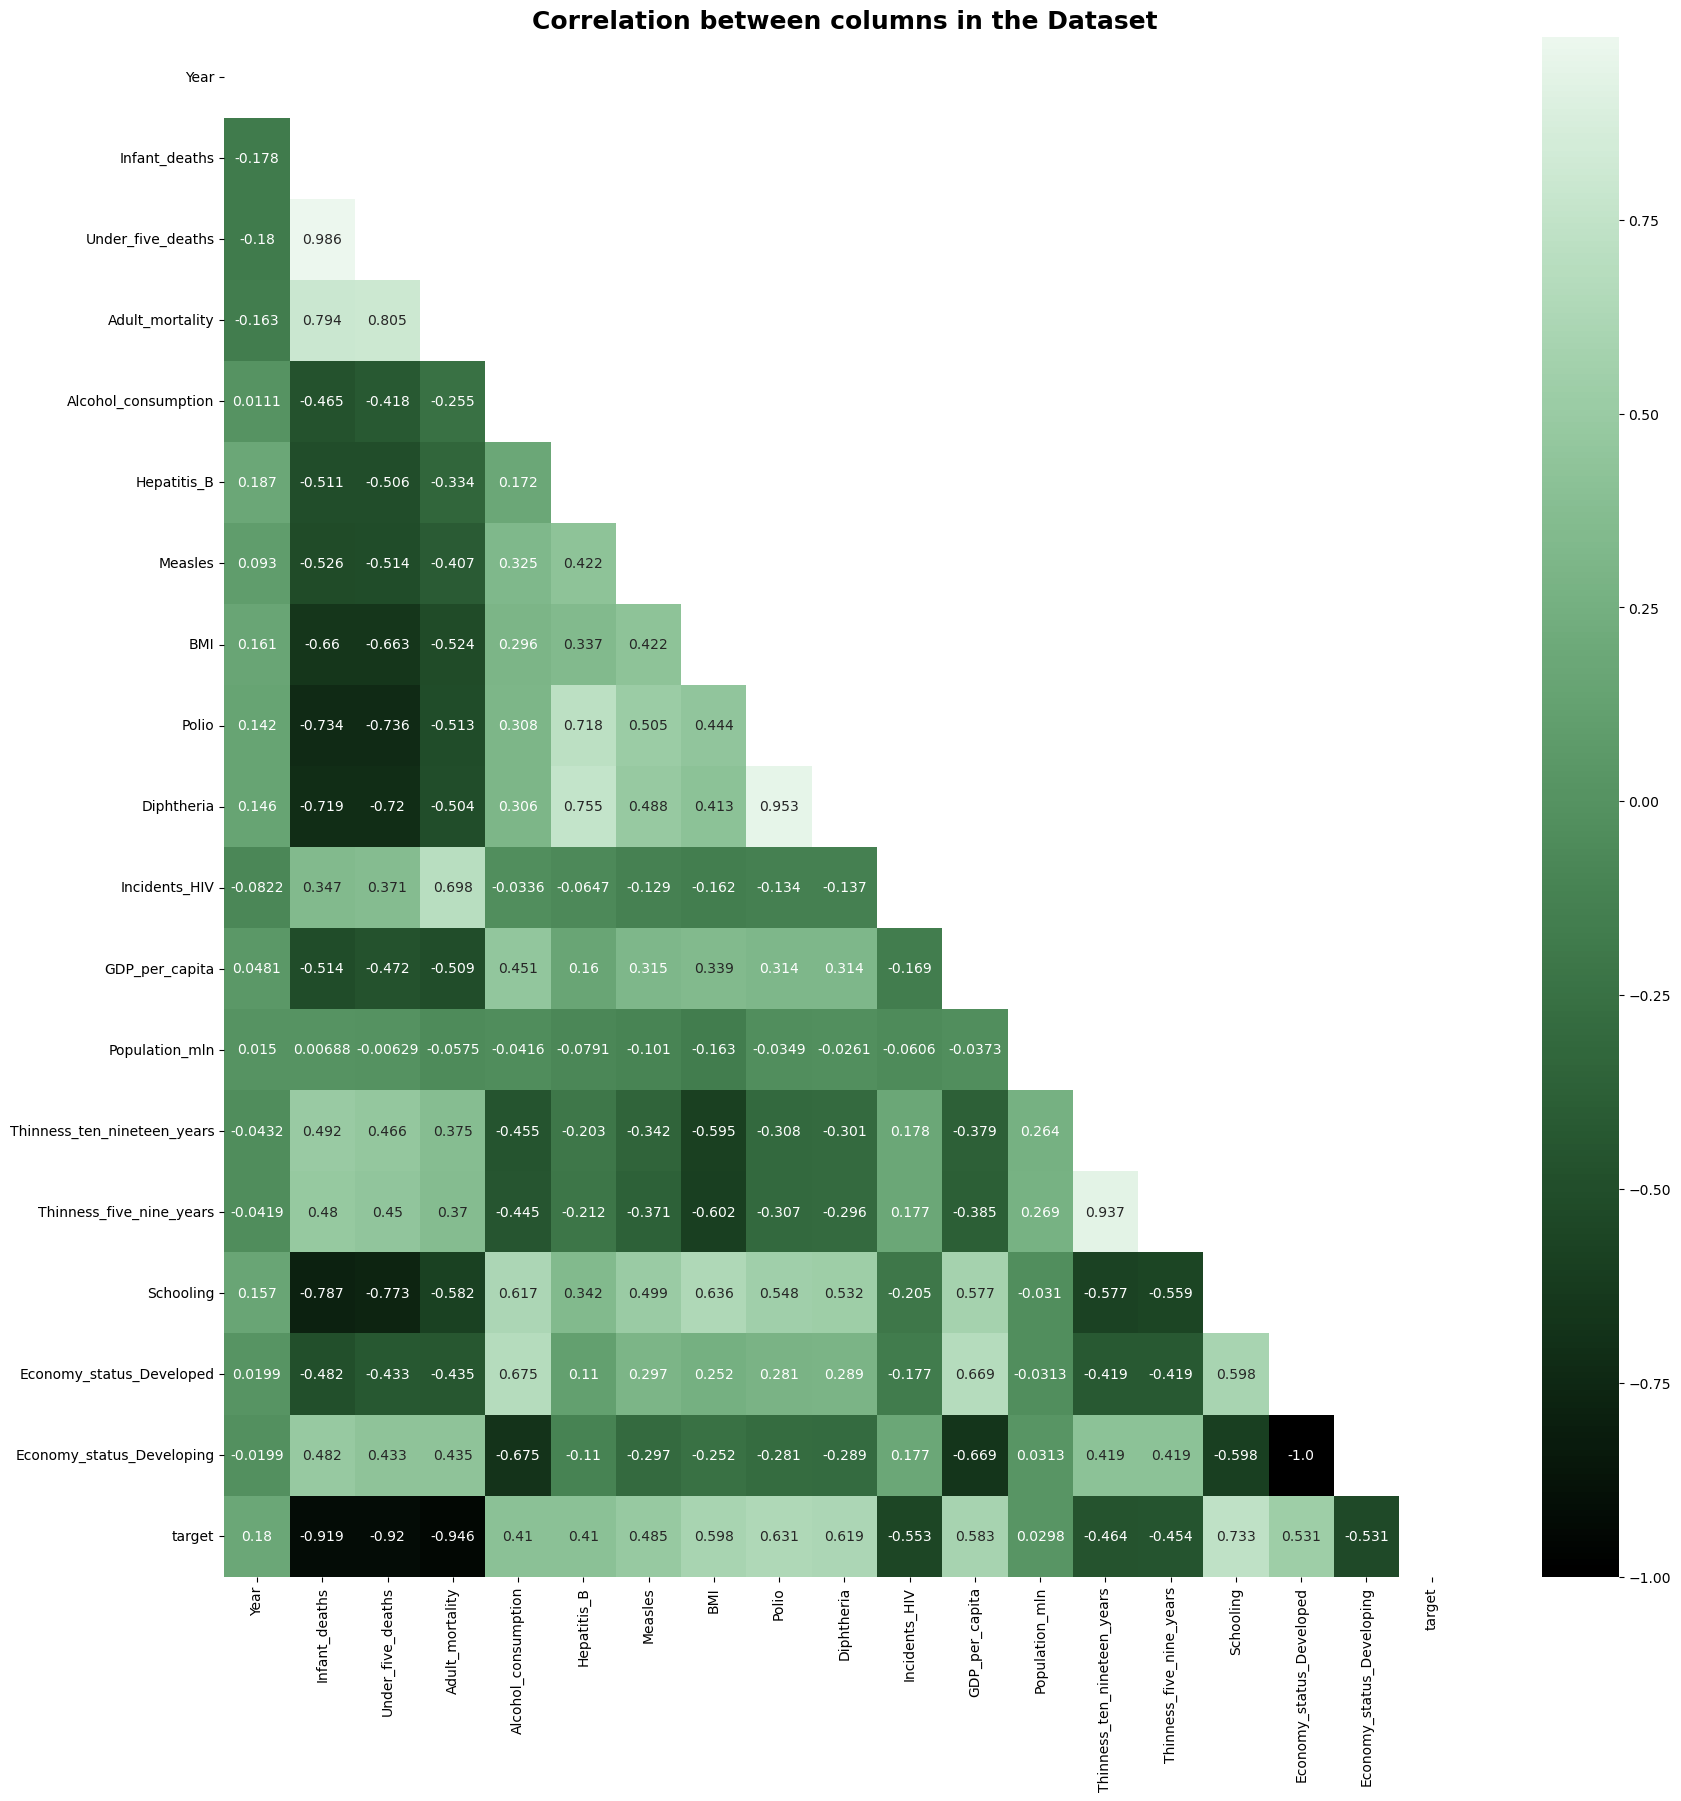

In [395]:
# correlation plot of the training data showing any multicolinearity
combined = X_train.copy()
combined['target'] = y_train

## Making the plot big enough to see all the values clearly
plt.figure(figsize = (20, 20))

## Plotting a heat map of the correlations between columns
sns.heatmap(combined.corr(numeric_only = True), 
            annot = True,
            fmt = '.3',
            cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True),
            mask = np.triu(combined.corr(numeric_only = True))
            ).set_title("Correlation between columns in the Dataset",weight='bold'
            ).set_fontsize('18')
            

plt.show()

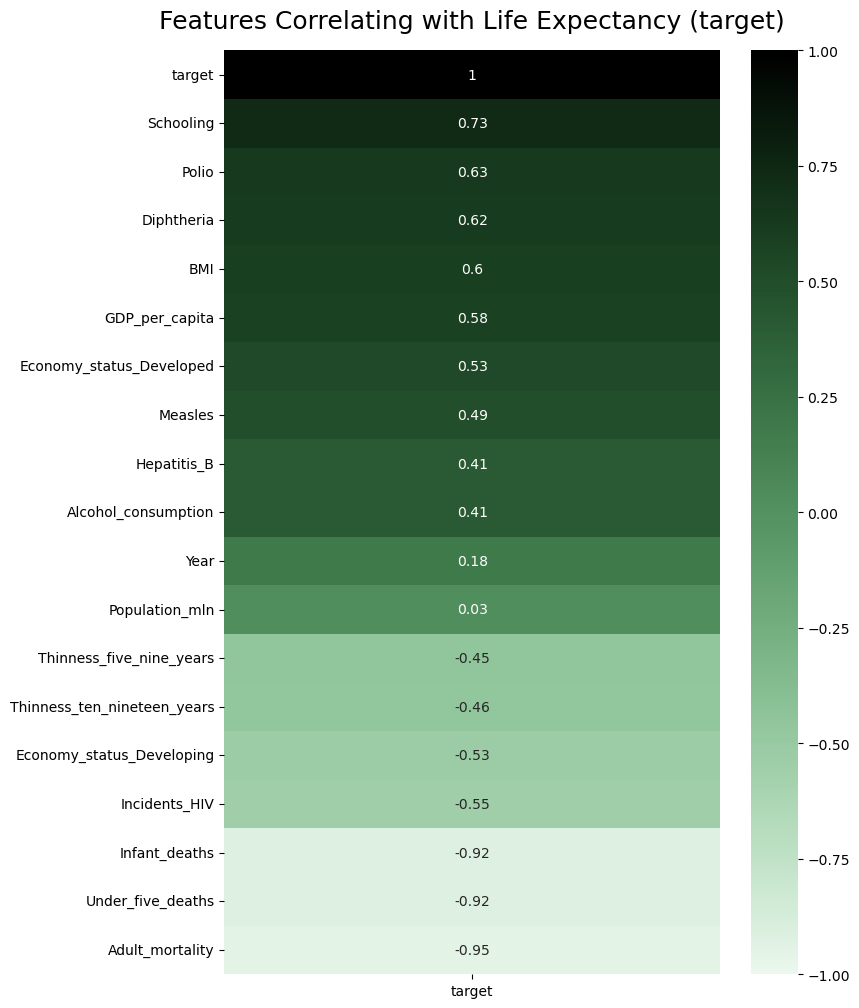

In [396]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(combined.corr(numeric_only = True)[['target']].sort_values(by='target', ascending=False),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap=sns.cubehelix_palette(start=2, rot=0, dark=.95, light=0, reverse=True, as_cmap=True))

heatmap.set_title('Features Correlating with Life Expectancy (target)', fontdict={'fontsize':18}, pad=16);

**Correlations worth noting**

<ol>
    <li>Economy Status developed/developing</li>
    <li>Under 5 deaths, Infant deaths and Adult mortality</li>
    <li>Thinness 10-19 and 5-9 years</li>
    <li>Diptheria and Polio (correlation is less strong but both are correlated with Hepatitis B)</li>
</ol>

<h3>Visual check for outliers in each column</h3>   

#### Designing the boxplots

In [400]:
## Selecting number columns that can be plotted
graphable = X_train.select_dtypes(include=np.number).columns
graphable = graphable.drop("Economy_status_Developed")
graphable = graphable.drop("Economy_status_Developing")

In [401]:
##Picking a palette for the boxplots
palette = [['#006F42'],['#11270B'],['#04E762']]*6
metadata = ["Year","Number of Infant Deaths per 1000 population","Number of under-five deaths per 1000 population","Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)","Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)",
           "Hepatitis B (HepB) immunization coverage among 1-year-olds (%)","Measles - number of reported cases per 1000 population","Average Body Mass Index of entire population","Polio (Pol3) immunization coverage among 1-year-olds (%)",
           "Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)","Deaths per 1 000 live births HIV/AIDS (0-4 years)","Gross Domestic Product per capita (in USD)","Population of the country",
           "Prevalence of thinness among children and adolescents for Age 10 to 19 (%)","Prevalence of thinness among children for Age 5 to 9(%)","Number of years of Schooling(years)",""]



#### Plotting the Box Plots

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


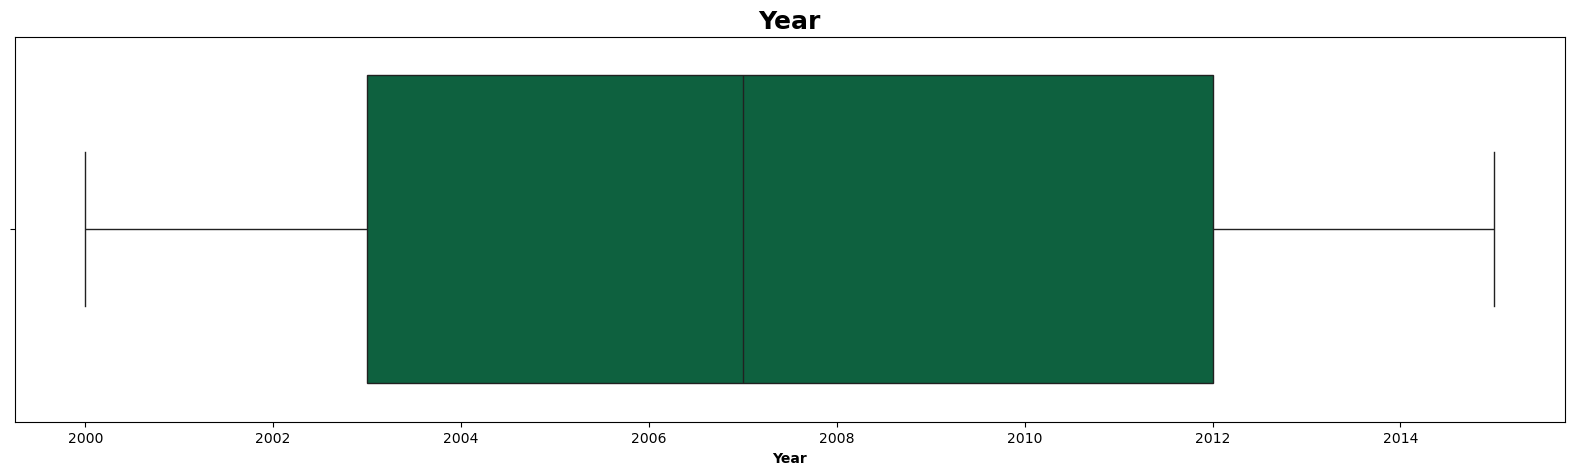

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


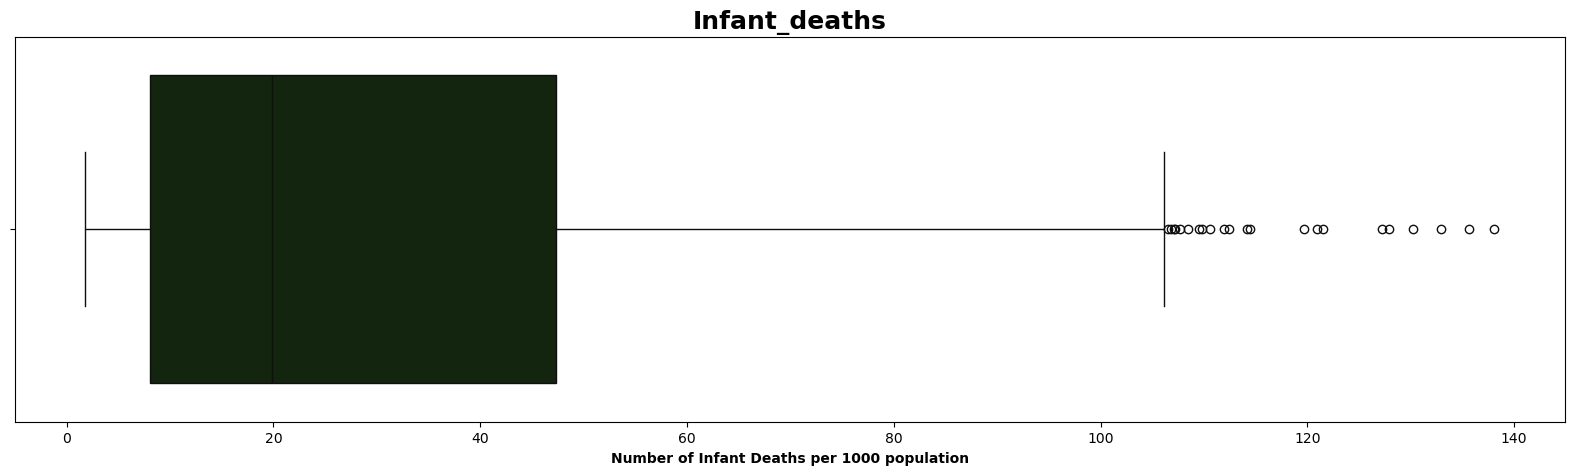

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


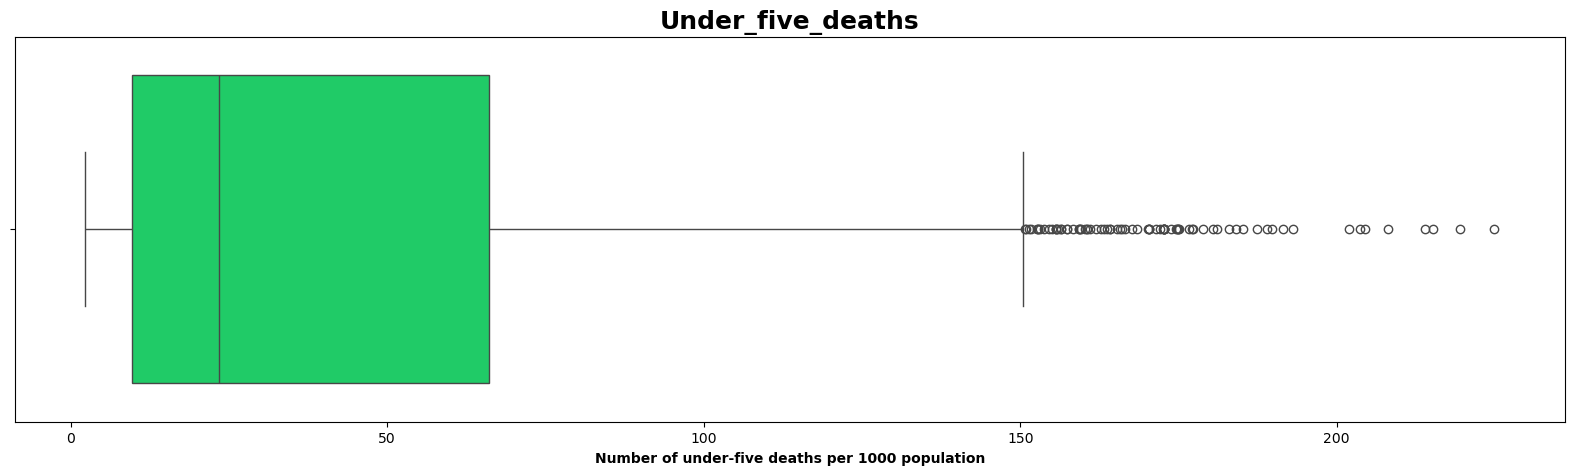

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


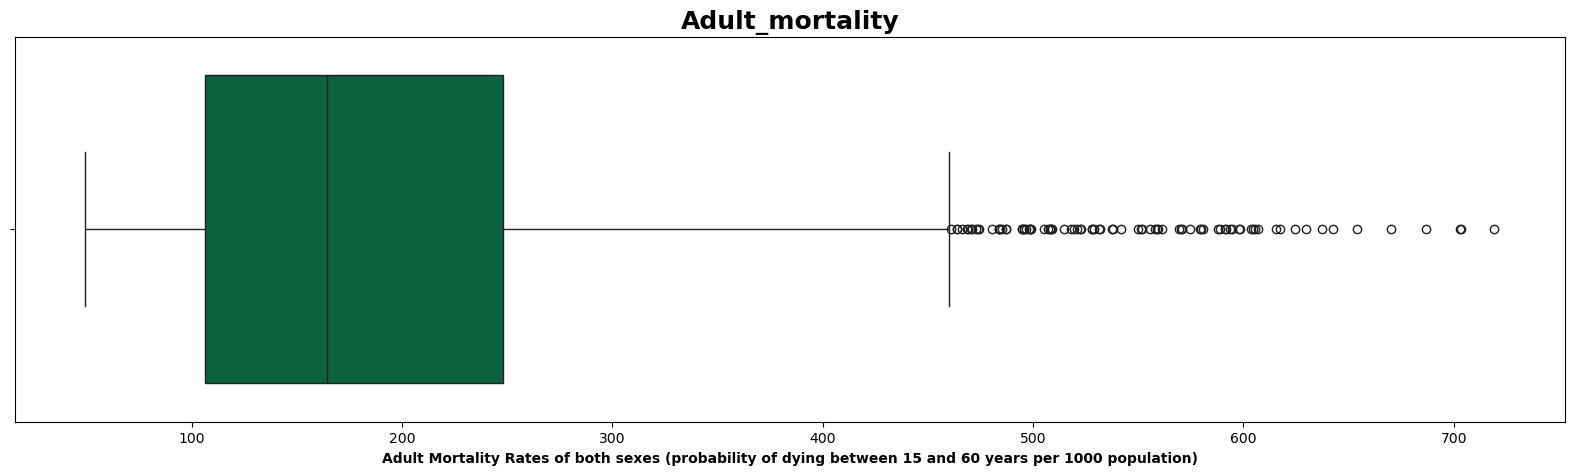

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


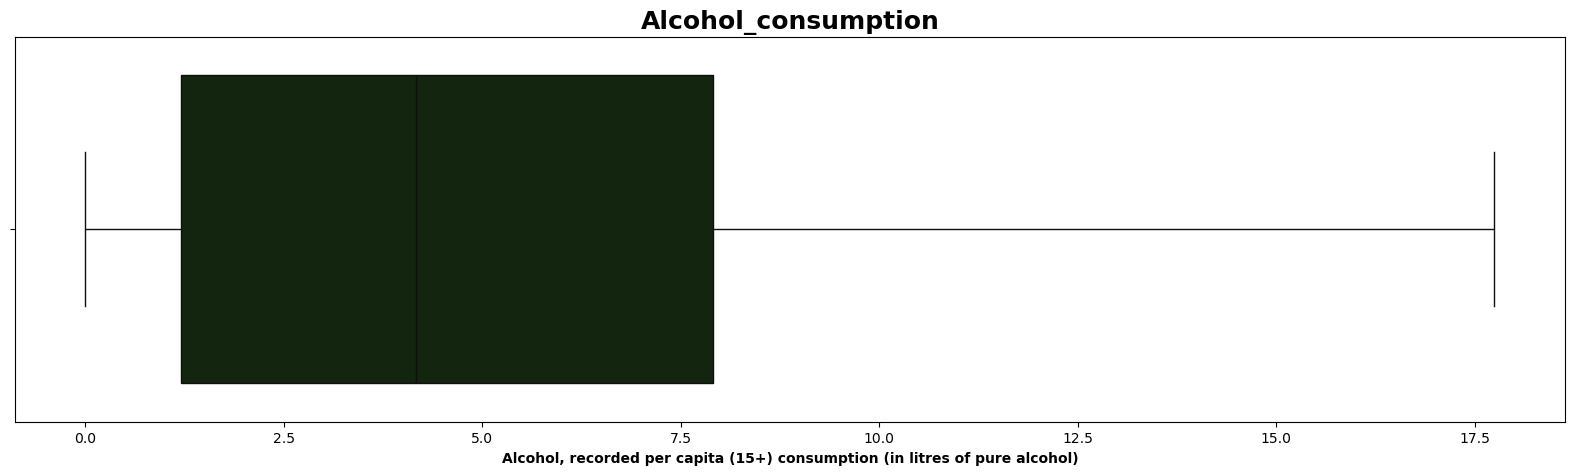

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


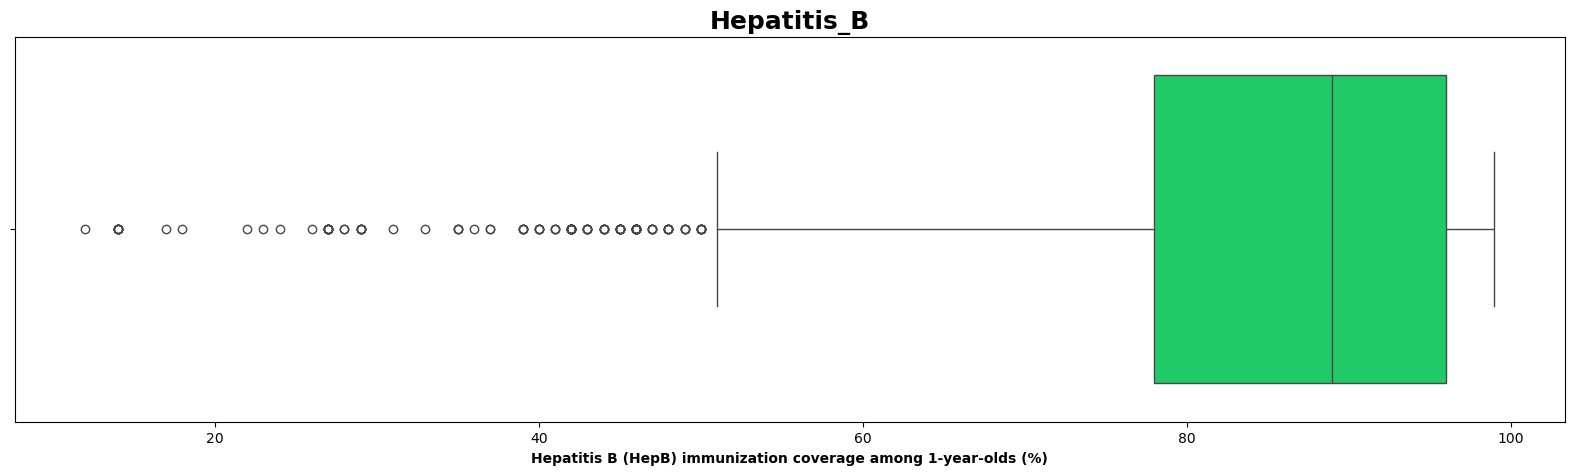

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


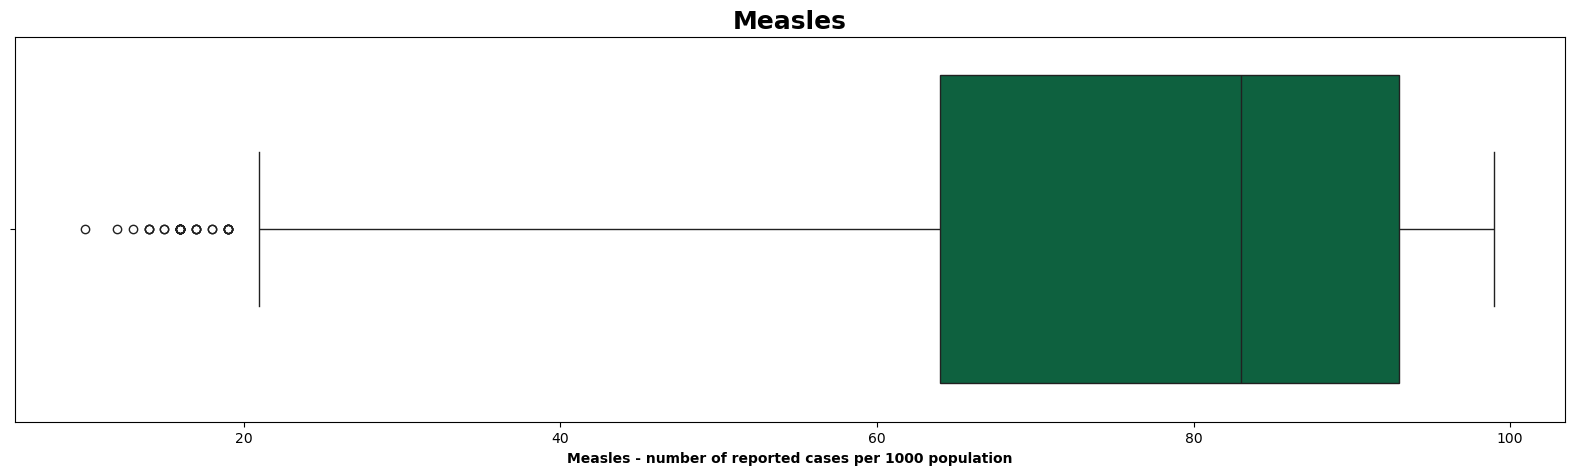

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


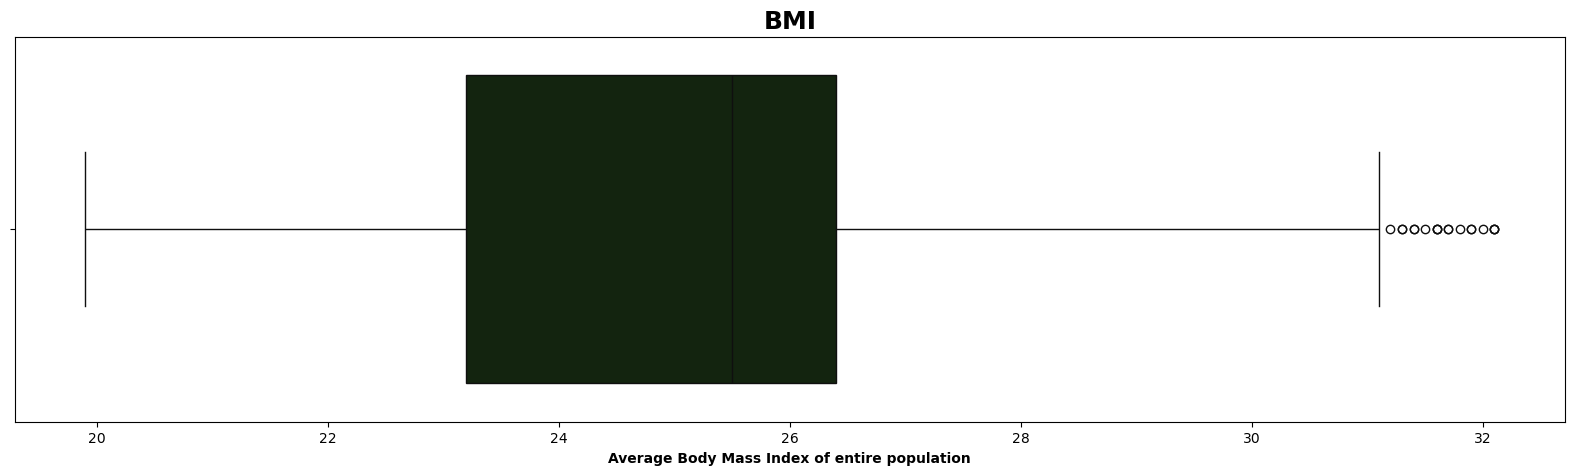

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


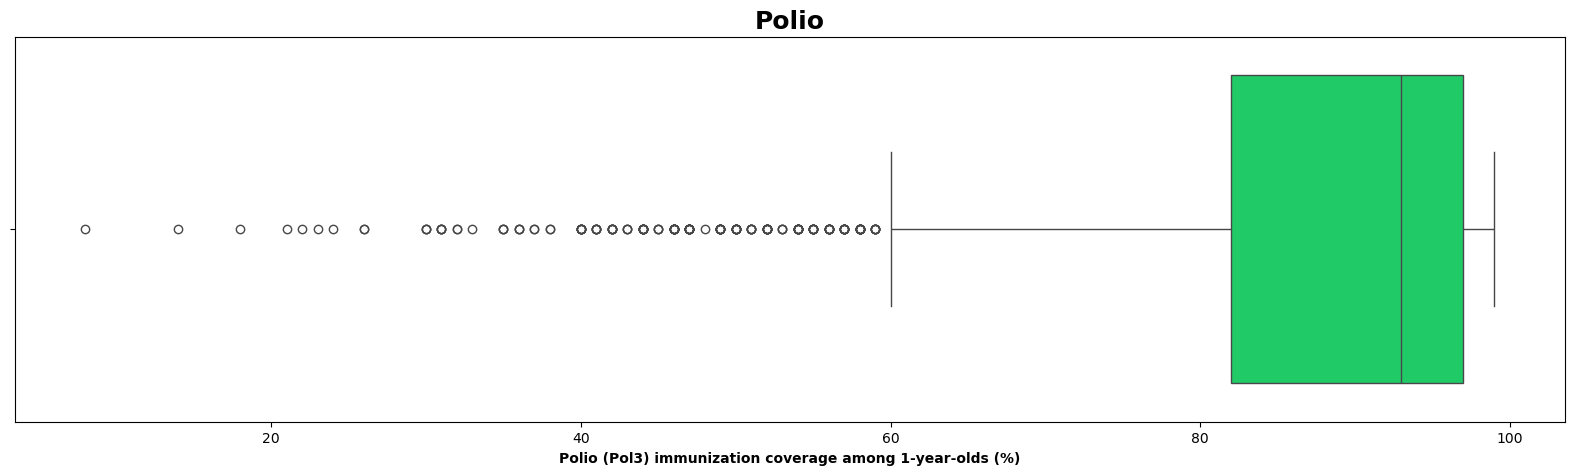

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


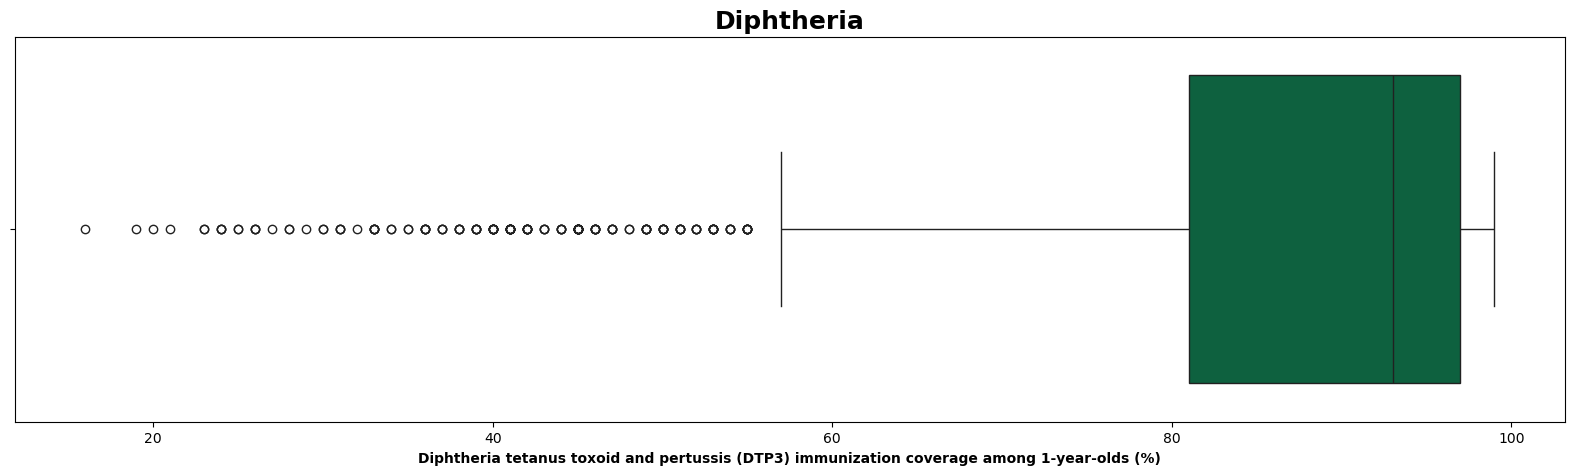

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


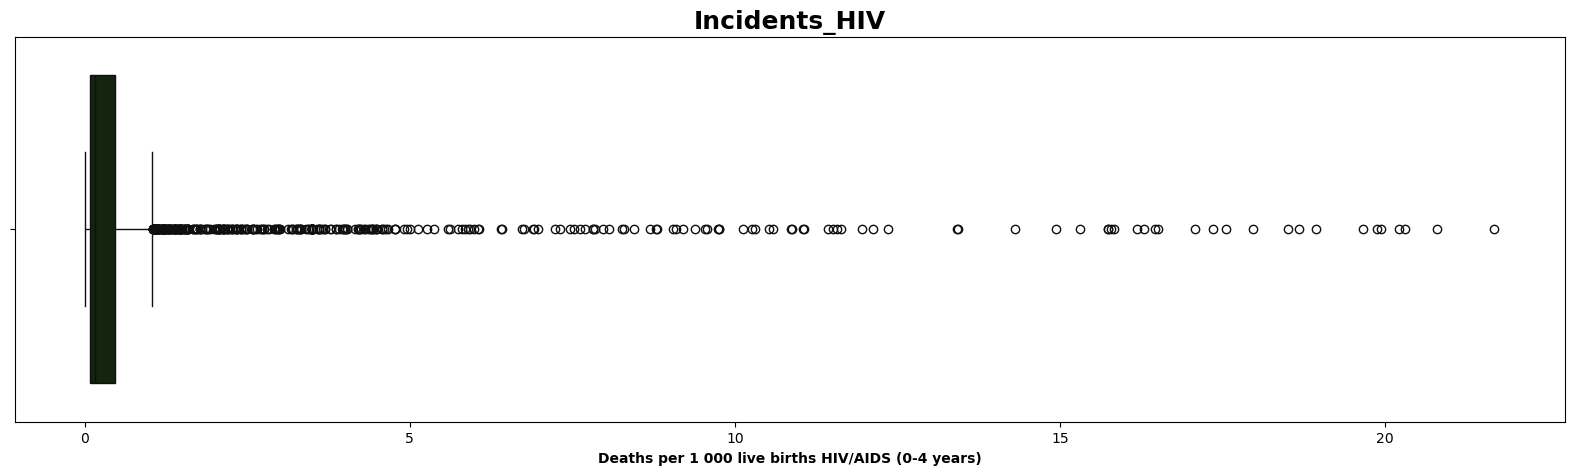

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


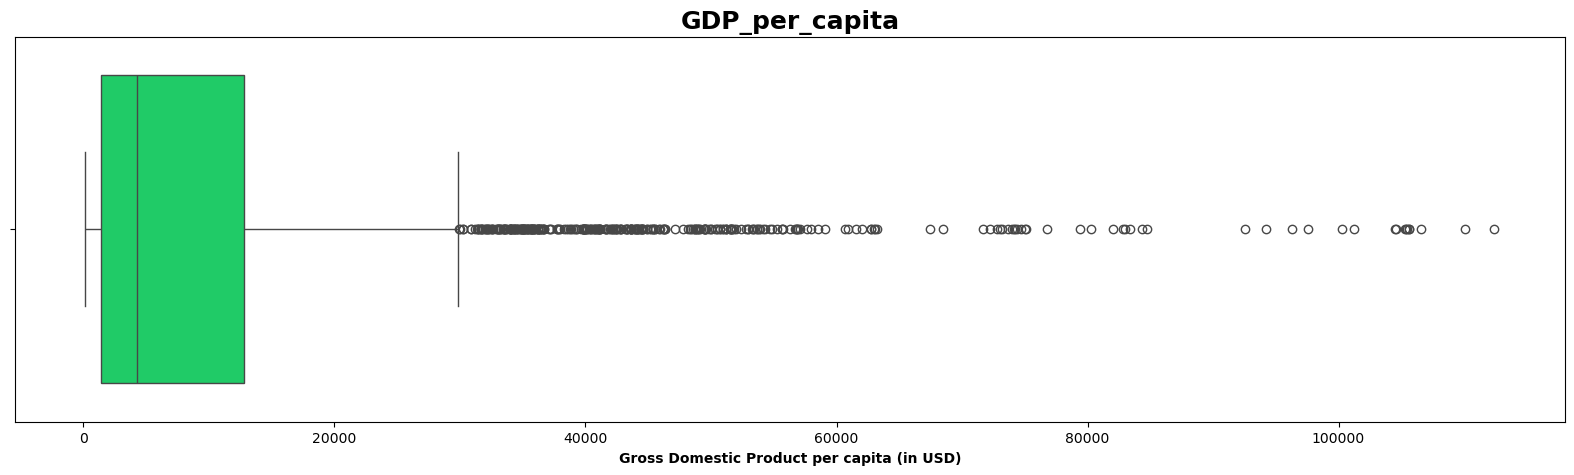

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


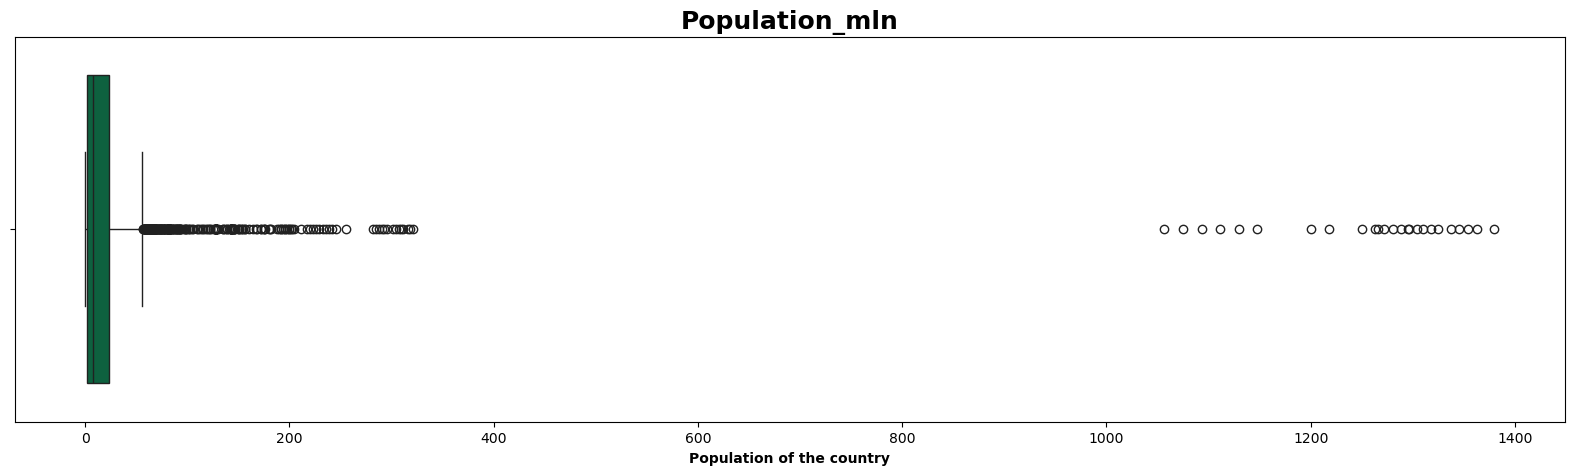

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


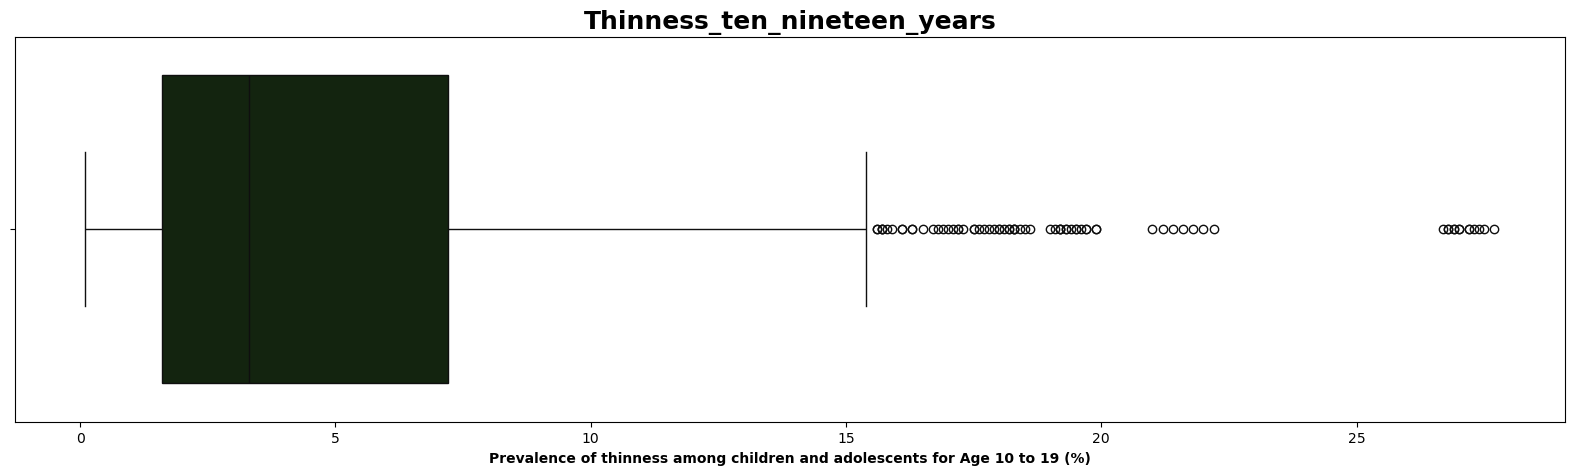

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


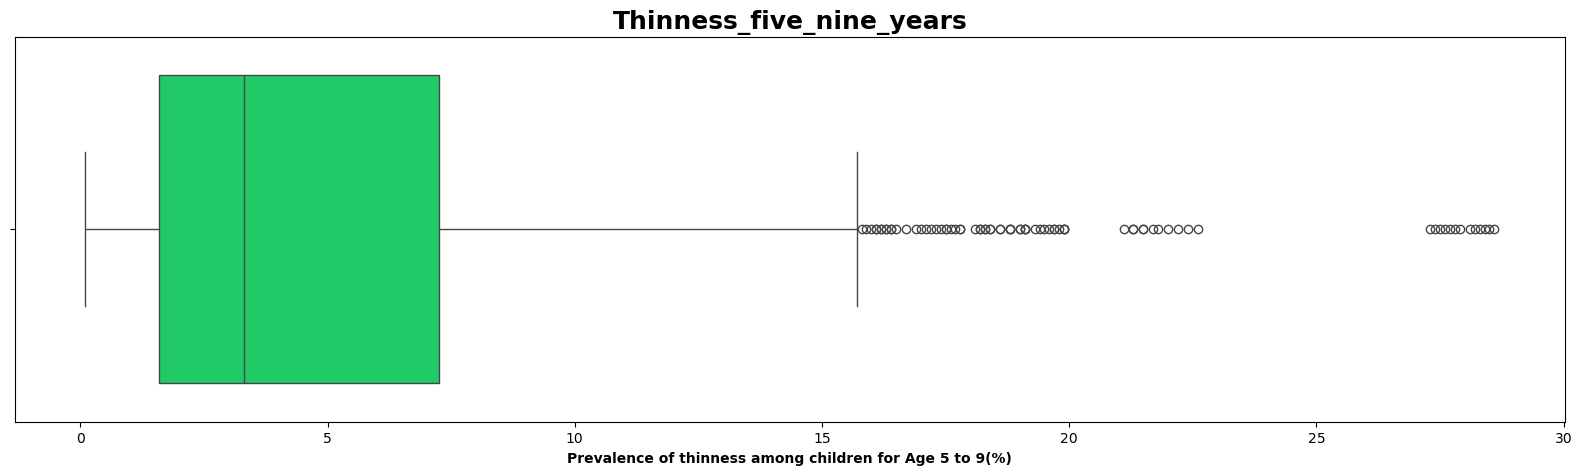

C:\Users\taich\AppData\Local\Temp\ipykernel_148048\3871371354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = X_train[col] ,


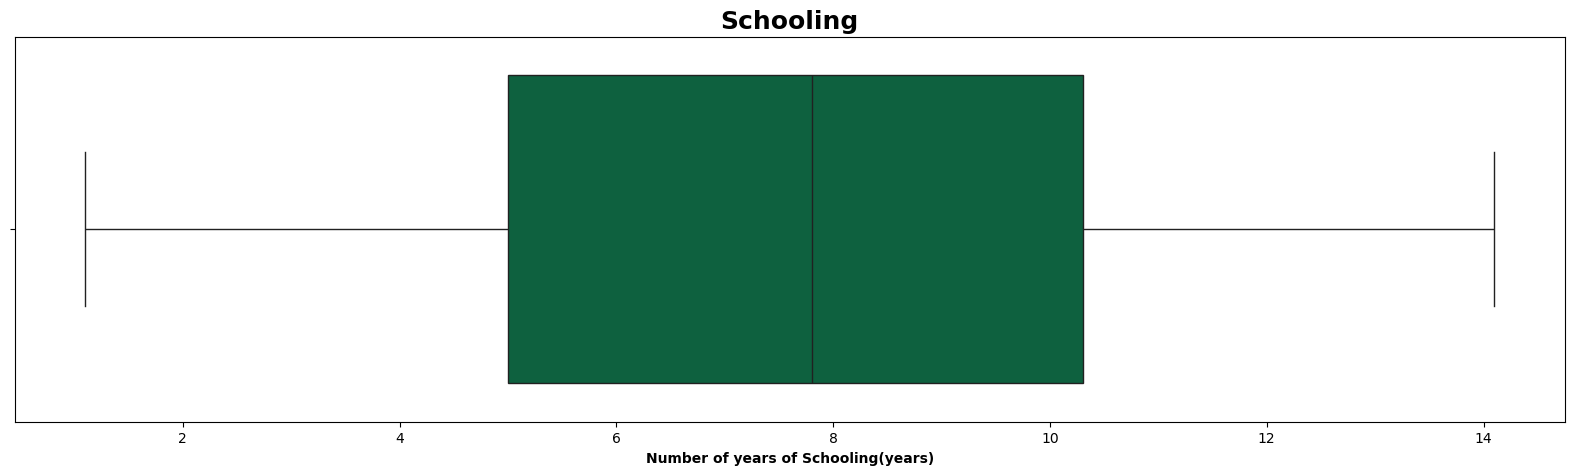

In [404]:
## Plotting box plot to understand distribution of values in each column
for i,col in enumerate(graphable):
    plt.figure(figsize = (20, 5))
    sns.boxplot(data = X_train[col] ,
                orient = 'h' , 
                palette=palette[i]
               ).set_title(col,weight='bold'
               ).set_fontsize('18')
    plt.xlabel(metadata[i], weight='bold')
    plt.show()

We can see from these box plots that there are clearly outliers in some of our columns. This will be useful in deciding upon methods of sclaing later on as some methods are more robust to outliers than others.

<h2 align= "left" style="color: #006F42">Cleaning</h2>   

When looking at the data there are only a couple of columns that need cleaning. The 'Alcohol_consumption' and 'Country' columns.

### Country

In [411]:
len(X_train.Country.unique()) ## How many unique countries we have in the training dataset

179

Due to the high cardinality of the Country column, one hot encoding would be drastically increase dimensionality and label encoding would suggest that there is an order to the countries which there is not.

#### Target encoding

In [414]:
def target_encoding(X_train, y_train):
    X_train['Life_expectancy'] = y_train
    mean_targets = X_train.groupby('Country')['Life_expectancy'].mean()
    X_train['target_encoding'] = X_train['Country'].map(mean_targets)
    return X_train

We attempted target encoding, however, this leads to a very high risk of overfitting in the case that the model starts memorising. The only solution to this problem is to split the data further to allow for an encoding set. The drawback to this is the high probability that the encoding set would miss some countries meaning they would not have a value in the target encoded column and a null value would break the model. Also, due to the nature of linear models being high bias, it would be unfair to base a country's results off of its name and not statistics for that specific entry.

### Alcohol consumption

The Alcohol_consumption column had many rows with 0 entries for Alcohol_consumption. Due to the high possibility that this is censored information and therefore missing dependant on value, it is best to just not use this column as it could negatively impact the accuracy of the prediction and it has just 0.41 correlation score with life expectancy.

### Region

Again, as mentioned above the high bias nature of linear models means giving a country their results based off the region they're in would unfairly score some countries. For example, in a low life expectancy region there could be a really high performing country that is negatively affected by the bias of their region.

### Cleaning function

**Due to the reasons above, it was best to drop all three columns.**

In [421]:
def cleaning(data):
    df = data.copy()
    return df.drop(columns = ['Country', 'Alcohol_consumption', 'Region'])

<h2 align= "left" style="color: #006F42"> Feature engineering</h2>  

### Initial model

Before feature engineering, we first fit a model to X_train without feature engineering to get a baseline for improving.

In [424]:
X_train_clean = cleaning(X_train)

In [425]:
## Important step for stats models!!
X_train_clean = sm.add_constant(X_train_clean)

## Initialising the model
lin_reg = sm.OLS(y_train, X_train_clean) ## Need to drop Region at this stage as its values are strings.

## Fitting the model
results = lin_reg.fit()

## Metrics of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     6656.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        14:59:11   Log-Likelihood:                -3956.1
No. Observations:                2291   AIC:                             7946.
Df Residuals:                    2274   BIC:                             8044.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          24.9603      8.491      2.940      0.003       8.310      41.611
Year                            0.0238      0.006      3.749      0.000       0.011       0.036
Infant_deaths                  -0.0583      0.007     -8.313      0.000      -0.072      -0.045
Under_five_deaths              -0.0492      0.004    -11.111      0.000      -0.058      -0.040
Adult_mortality                -0.0477      0.001    -70.496      0.000      -0.049      -0.046
Hepatitis_B                    -0.0086      0.003     -2.989      0.003      -0.014      -0.003
Measles                         0.0023      0.002      1.193      0.233      -0.001       0.006
BMI                            -0.1625      0.022     -7.542      0.000      -0.205      -0.120
Polio                           0.0045      0.007      0.682      0.496      -0.008       0.017
Diphtheria                     -0.0007      0.007     -0.105      0.916      -0.014       0.012
Incidents_HIV                   0.0912      0.020      4.542      0.000       0.052       0.131
GDP_per_capita               2.309e-05   2.52e-06      9.173      0.000    1.82e-05     2.8e-05
Population_mln              -2.332e-05      0.000     -0.102      0.918      -0.000       0.000
Thinness_ten_nineteen_years    -0.0336      0.019     -1.762      0.078      -0.071       0.004
Thinness_five_nine_years       -0.0053      0.019     -0.283      0.777      -0.042       0.032
Schooling                       0.1350      0.018      7.407      0.000       0.099       0.171
Economy_status_Developed       12.9722      4.243      3.057      0.002       4.652      21.293
Economy_status_Developing      11.9881      4.248      2.822      0.005       3.657      20.319
==============================================================================
Omnibus:                       13.895   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.683
Skew:                           0.130   Prob(JB):                     0.000393
Kurtosis:                       3.311   Cond. No.                     2.04e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### First notes

Some noticable metrics of this model are:
<ol>
    <li>The R-squared score is good (> 0.9) </li>
    <li>
        Very large condition number suggesting:
        <ul>
            <li>Strong multicollinearity</li>
            <li>A small change to coefficients will have a large impact on the resulting model</li>
        </ul>
    </li>
    <li>High P-values for certain columns</li>
</ol>

This gives us a place to start with our feature engineering.

### Scaling

One way to try to help reduce the high condition number is scaling, this is because scaling our values between 0-1 means that our coefficients will be larger and therefore small changes will have less impact.


>There were 4 types of scaling used to get all our columns to range from 0 to 1.
>
> These were:
> <ol>
>    <li>Dividing by 100 (for percentages)</li>
>    <li>Dividing by 1000 (for stats per 1000 population)</li>
>    <li>Min-max scaling (for columns with no outliers)</li>
>    <li>Robust scaling (for columns with outliers)</li>
> </ol>
>

When scaling our columns in both test and train, we ensured both datasets were scaled in relation to train to avoid data leakage.

#### Dividing by 100 and 1000

In [429]:
## This function divides all values in the column by 'n'
def divided_by_n(dataset, col, n):
    dataset[col] = dataset[col]/n
    return dataset[col] ## Returned scaled column

#### Robust scaling

In [432]:
## As above, this function calculates the scale from the training set to avoid data leakage
def robust_scaling(dataset, training_set, col):
    Q1 = training_set[col].quantile(q=0.25) ## Q1 of col in X_train
    Q2 = training_set[col].quantile(q=0.5) ## Median of col in X_train
    Q3 = training_set[col].quantile(q=0.75) ## Q3 of col in X_train
    IQR = Q3 - Q1 ## Interquartile range
    dataset[col] = (dataset[col]-Q2)/IQR
    return dataset[col] ## Returned scaled column

The condition we set to determine outliers were any values not in:

`[Q1 - 1.5IQR, Q3 + 1.5IQR]` (end points inclusive)

We found which columns to do robust scaling on with the function below. 

In [436]:
def outliers(df):
    outliers = []
    for i in df.columns:
        if i != 'Country' and i != 'Region':
            Q1 = df[i].quantile(q=0.25)
            Q3 = df[i].quantile(q=0.75)
            IQR = Q3 - Q1
            if max(df[i]) > (Q3 + (1.5 * IQR)) or min(df[i]) < (Q1 - (1.5 * IQR)):
                outliers.append(i)
    return outliers ## Returns list of columns that include a value outside of the window mentioned above.

#### Min-max scaling

In [441]:
## This function can scale both X_train and X_test but ensures that the 
## min and max values are from the training set to avoid data leakage
def min_max_scaling(dataset, training_set, col):
    minimum = training_set[col].min()
    maximum = training_set[col].max()
    dataset[col] = (dataset[col] - minimum) / (maximum-minimum)
    return dataset[col] ## Returned scaled column

### Feature engineering function with scaling added

In [444]:
def feature_engineering(data, training_set):
    df = data.copy()
    train = training_set.copy()
    
    #(Infant_deaths, Under_five_deaths, Adult_mortality, 
    #Incidents_HIV, Population_mln, Thinness_ten_nineteen_years, 
    #Thinness_five_nine_years, Economy_status_Developing)
    
    ## Setting the columns that will be scaled by each of the scaling methods.
    cols_100 = ['Hepatitis_B','Polio','Diphtheria','Thinness_ten_nineteen_years','Thinness_five_nine_years']
    cols_1000 = ['Adult_mortality','Infant_deaths','Measles','Under_five_deaths','Incidents_HIV']
    cols_min_max = ['Year','Schooling']
    cols_robust = ['BMI','GDP_per_capita','Population_mln']
    
    ## Loop through the lists above to use appropriate scale for each column
    for col in cols_100:
        df[col] = divided_by_n(df, col, 100)
    for col in cols_1000:
        df[col] = divided_by_n(df, col, 1000)
    for col in cols_min_max:
        df[col] = min_max_scaling(df, train, col)
    for col in cols_robust:
        df[col] = robust_scaling(df, train, col)    
    
    ## Add constant column (important step in sm)
    df = sm.add_constant(df)
    
    return df ## return feature engineered dataframe

### Deciding which features to keep

In order to determine which features to keep we tested a function that calculated the RMSE and condition number of every possible model that could be created from our cleaned and feature engineered X_train.

**PLEASE DO NOT ATTEMPT TO RUN THE COMMENTED OUT CODE BELOW!**

**Important note: kernal was restarted after producing the findings below to avoid memorisation.**

In [449]:
## Getting X_train ready for the function
X_train_fe = X_train.copy()
X_train_fe = cleaning(X_train_fe)
X_train_fe = feature_engineering(X_train_fe, X_train_fe)

In [450]:
from itertools import combinations ## Import combinations function

In [451]:
# col_combo = []

# X_train_fe = X_train_fe.drop(columns = 'const')

# for i in range(1,len(X_train_fe.columns)+1):
#         for combo in combinations(X_train_fe, i):
#             X_subset = X_train[list(combo)]
#             X_subset = sm.add_constant(X_subset)
#             lin_reg = sm.OLS(y_train, X_subset)
#             results = lin_reg.fit()
            
#             y_pred = results.predict(X_subset)

#             rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
            
#             temp = []
#             temp.append(rmse)
#             temp.append(results.condition_number)
#             temp.append(combo)
#             col_combo.append(temp)
            

# column_results = pd.DataFrame(col_combo, columns = ['rmse', 'cond_no', 'columns'])

In [452]:
pd.set_option('display.max_colwidth', None) ## see full list of columns

<hr/>
We can then find the lowest possible rmse for the scaled X_train using:

```column_results.sort_values(by = 'rmse').head()```

The 5 combinations of columns that return the lowest RMSE are:

<img src = 'https://github.com/tdch3n/who-pictures/blob/main/low_rmse.png?raw=true'>

<hr/>

To deal with the high condition number we can set a limit as seen with this code:

```column_results[column_results.cond_no < 1000].sort_values(by = 'rmse').head()```

The top 5 lowest RMSE producing combinations with a condition number less than 1000 are:

<img src = 'https://github.com/tdch3n/who-pictures/blob/main/lowest_rmse_sub1000.png?raw=true'>

<hr/>

### Best model

In [464]:
def feature_engineering_best(data, training_set):
    df = data.copy()
    train = training_set.copy()
    
    df = df[['Infant_deaths', 'Adult_mortality', 'Under_five_deaths',
            'Incidents_HIV', 'Thinness_five_nine_years', 'Economy_status_Developed']]
    
    ## Setting the columns that will be scaled by each of the scaling methods.
    cols_100 = ['Thinness_five_nine_years']
    cols_1000 = ['Adult_mortality','Infant_deaths','Under_five_deaths','Incidents_HIV']

    ## Loop through the lists above to use appropriate scale for each column
    for col in cols_100:
        df[col] = divided_by_n(df, col, 100)
    for col in cols_1000:
        df[col] = divided_by_n(df, col, 1000) 
    
    ## Add constant column (important step in sm)
    df = sm.add_constant(df)
    
    return df ## return feature engineered dataframe

In [465]:
## Important step for stats models!!
X_train_best = feature_engineering_best(X_train_clean, X_train_clean)

## Initialising the model
lin_reg = sm.OLS(y_train, X_train_best) ## Need to drop Region at this stage as its values are strings.

## Fitting the model
results3 = lin_reg.fit()

## Metrics of the model
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.606e+04
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        14:59:14   Log-Likelihood:                -4073.1
No. Observations:                2291   AIC:                             8160.
Df Residuals:                    2284   BIC:                             8200.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       81.8136      0.101    806.355      0.000      81.615      82.013
Infant_deaths              -68.5262      7.221     -9.489      0.000     -82.687     -54.365
Adult_mortality            -48.2937      0.651    -74.129      0.000     -49.571     -47.016
Under_five_deaths          -45.7010      4.401    -10.385      0.000     -54.330     -37.072
Incidents_HIV              104.3415     19.859      5.254      0.000      65.398     143.285
Thinness_five_nine_years    -2.3791      0.785     -3.030      0.002      -3.919      -0.839
Economy_status_Developed     1.9295      0.092     21.034      0.000       1.750       2.109
==============================================================================
Omnibus:                        8.416   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               10.600
Skew:                          -0.018   Prob(JB):                      0.00499
Kurtosis:                       3.331   Cond. No.                         694.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [466]:
y_best_pred = results3.predict(X_train_best)

rmse2 = statsmodels.tools.eval_measures.rmse(y_train, y_best_pred)

rmse2

1.4318191138447105

#### Testing set results

In [468]:
X_test_clean = X_test.copy()

X_test_best = feature_engineering_best(X_test_clean, X_train_clean)

In [469]:
y_best_test = results3.predict(X_test_best)

rmse_test2 = statsmodels.tools.eval_measures.rmse(y_test, y_best_test)

rmse_test2

1.435554557054009

### Minimum model

In [476]:
def feature_engineering_min(data, training_set):
    df = data.copy()
    train = training_set.copy()
    
    df = df[['Economy_status_Developed', 'GDP_per_capita', 'Adult_mortality','Year']]
    ## Setting the columns that will be scaled by each of the scaling methods.
    cols_1000 = ['Adult_mortality']
    cols_min_max = ['Year']
    cols_robust = ['GDP_per_capita']
    
    ## Loop through the lists above to use appropriate scale for each column
    for col in cols_1000:
        df[col] = divided_by_n(df, col, 1000)
    for col in cols_min_max:
        df[col] = min_max_scaling(df, train, col)
    for col in cols_robust:
        df[col] = robust_scaling(df, train, col)    
    
    ## Add constant column (important step in sm)
    df = sm.add_constant(df)
    
    return df ## return feature engineered dataframe

In [477]:
## Important step for stats models!!
X_train_min = feature_engineering_min(X_train_clean, X_train_clean)

## Initialising the model
lin_reg = sm.OLS(y_train, X_train_min) ## Need to drop Region at this stage as its values are strings.

## Fitting the model
results2 = lin_reg.fit()

## Metrics of the model
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     6279.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        14:59:15   Log-Likelihood:                -5541.4
No. Observations:                2291   AIC:                         1.109e+04
Df Residuals:                    2286   BIC:                         1.112e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       80.9169      0.183    441.580      0.000      80.558      81.276
Economy_status_Developed     2.5145      0.191     13.200      0.000       2.141       2.888
GDP_per_capita               0.4601      0.054      8.568      0.000       0.355       0.565
Adult_mortality            -69.7574      0.586   -118.967      0.000     -70.907     -68.608
Year                         1.0802      0.186      5.796      0.000       0.715       1.446
==============================================================================
Omnibus:                       58.574   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.017
Skew:                          -0.140   Prob(JB):                     1.43e-26
Kurtosis:                       4.081   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [478]:
y_min_pred = results2.predict(X_train_min)

rmse = statsmodels.tools.eval_measures.rmse(y_train, y_min_pred)

rmse

2.717788722020158

#### Testing

In [483]:
X_test_clean = X_test.copy()

X_test_min = feature_engineering_min(X_test_clean, X_train_clean)

In [484]:
y_min_test = results2.predict(X_test_min)

rmse_test = statsmodels.tools.eval_measures.rmse(y_test, y_min_test)

rmse_test

2.8680726860983694